# Gradient Descent
The purpose of gradient descent is to reach the minimum of some specified loss function. In machine learning it is called optimization and machines "learn" by optimizing cost functions.

In the example below, func_z is the defined function to which we are attempting to optimize. In addition to help the gradient descent portion we have also defined partial derivatives as der_x and der_y.

Finally, we have the initial values specified. Note the impact these initial values have on the gradient descent problem.

In [63]:
"""
Code example pulled from Dr. Derek Anderson's lecture notes

Additions made to clarify points and add exercises for testing and experimenting done by Matthew Carroll
"""

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [64]:
# what function do you want to run?
WhichFx = 3

if(WhichFx==1):

    def func_z(x, y):
        z = x**2/10. + x*y/50. + y**2.
        return z

    def der_x(x, y):
        return (2*x/10. + y/50.)

    def der_y(x, y):
        return (x/50. + 2*y/1.)

    bounds = np.asarray([-3,3])
    # location to start at
    x0 = 3
    y0 = 2
    # learning rate
    learning_rate = [0.01, 0.1, 0.9]
    # number of epochs
    epoch = 100

elif(WhichFx==2):

    def func_z(x, y):
        z = x**2 + 3 * np.sin(y)
        return z

    def der_x(x, y):
        return 2*x

    def der_y(x, y):
        return 3 * np.cos(y)

    bounds = np.asarray([-6,6])
    x0 = 4
    y0 = 1
    learning_rate = [0.01, 0.2, 0.9]
    epoch = 100

if(WhichFx==3):

    def func_z(x, y):
        z = x**4 - 2*x**2 + y**2
        return z

    def der_x(x, y):
        return 4*x**3 - 4*x

    def der_y(x, y):
        return 2*y

    bounds = np.asarray([-3,3])
    x0 = -2
    y0 = -2
    learning_rate = [0.001, 0.01, 0.15]
    epoch = 50


## Slight Theory Intro

The following video, "Gradient Descent, Step-by-Step" by StatQuest, explains the intuition behind gradient descent from a linear regression process. Since gradient descent is an optimizer used throughout machine learning it will appear throughout shallow and deep learning.

After that is a simple code implementation of the basic gradient descent algorithm.

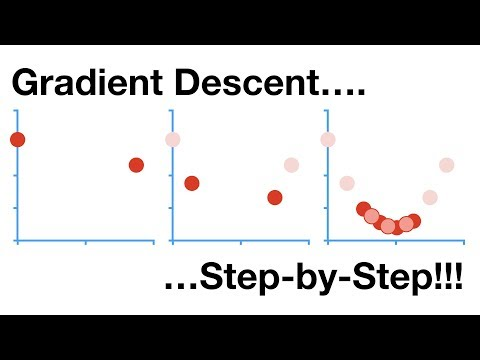

In [65]:
from IPython.display import YouTubeVideo

YouTubeVideo('sDv4f4s2SB8', width=800, height=300)

In [66]:
def gradient_descent(previous_x, previous_y, learning_rate, epoch):
    x_gd = []
    y_gd = []
    z_gd = []

    x_gd.append(previous_x)
    y_gd.append(previous_y)
    z_gd.append(func_z(previous_x, previous_y))

    for i in range(epoch):
        dx = der_x(previous_x, previous_y)
        dy = der_y(previous_x, previous_y)

        current_x = previous_x - (learning_rate * dx)
        x_gd.append(current_x)

        current_y = previous_y - (learning_rate * dy)
        y_gd.append(current_y)

        z_gd.append(func_z(current_x, current_y))

        previous_x = current_x
        previous_y = current_y

    return x_gd, y_gd, z_gd

## Run the Program

Lines 3-5 are running gradient descent with different learning rates as defined above. After that the program plots the results found.

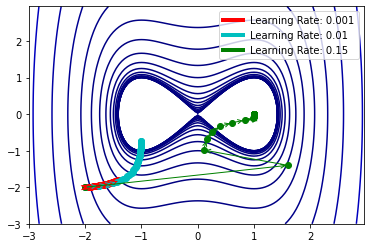

In [67]:
from matplotlib.lines import Line2D

x_gd1, y_gd1, z_gd1 = gradient_descent(x0, y0, learning_rate[0], epoch)
x_gd2, y_gd2, z_gd2 = gradient_descent(x0, y0, learning_rate[1], epoch)
x_gd3, y_gd3, z_gd3 = gradient_descent(x0, y0, learning_rate[2], epoch)

a = np.arange(bounds[0], bounds[1], 0.05)
b = np.arange(bounds[0], bounds[1], 0.05)
x, y = np.meshgrid(a, b)
z = func_z(x, y)
fig1, ax1 = plt.subplots()
ax1.contour(x, y, z, levels=np.logspace(bounds[0], bounds[1], 25), cmap='jet')

# Plot our steps
ax1.plot(x_gd1, y_gd1, 'ro')
for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gd1[i], y_gd1[i]), xytext=(x_gd1[i-1], y_gd1[i-1]),
                 arrowprops={'arrowstyle': '->', 'color': 'r', 'lw': 1},
                 va='center', ha='center')

# Plot our steps
ax1.plot(x_gd2, y_gd2, 'co')
for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gd2[i], y_gd2[i]), xytext=(x_gd2[i-1], y_gd2[i-1]),
                 arrowprops={'arrowstyle': '->', 'color': 'c', 'lw': 1},
                 va='center', ha='center')

# # Plot our steps
ax1.plot(x_gd3, y_gd3, 'go')
for i in range(1, epoch+1):
    ax1.annotate('', xy=(x_gd3[i], y_gd3[i]), xytext=(x_gd3[i-1], y_gd3[i-1]),
                 arrowprops={'arrowstyle': '->', 'color': 'g', 'lw': 1},
                 va='center', ha='center')

legend_elements = [Line2D([0], [0], color='r', lw=4, label='Learning Rate: {}'.format(learning_rate[0])),
                   Line2D([0], [0], color='c', lw=4, label='Learning Rate: {}'.format(learning_rate[1])),
                   Line2D([0], [0], color='g', lw=4, label='Learning Rate: {}'.format(learning_rate[2]))]
ax1.legend(handles=legend_elements, loc='upper right')
plt.show()

## Exercises
1. Where is the local minimum of this function located? (Provide coordinates)
2. What happens when the learning rate increases? How about when it decreases?
3. Change the initial values for x0 and y0. What happens?